In [1]:
import pickle
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import torch

In [3]:
def shuffle_and_pick(data, amount):
    shuffle_idxs = torch.randperm(data[0].shape[0])

    pose_shuffled = data[0][shuffle_idxs]
    img_shuffled = data[1][shuffle_idxs]

    data_out = (pose_shuffled[:100], img_shuffled[:100])

    return data_out

In [3]:
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/shapes_dif_fixed_rgb8_1_1.pkl", 'rb') as f:
    data1 = pickle.load(f)
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/shapes_dif_fixed_rgb8_1_2.pkl", 'rb') as f:
    data2 = pickle.load(f)
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/shapes_dif_fixed_rgb8_1_3.pkl", 'rb') as f:
    data3 = pickle.load(f)
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/shapes_dif_fixed_rgb8_1_4.pkl", 'rb') as f:
    data4 = pickle.load(f)

data = data1 + data2 + data3 + data4

print(len(data))

10000


In [4]:
pose = np.array([list(x[0]) for x in data])
img = np.array([x[1] for x in data])

[-3.211  6.513]


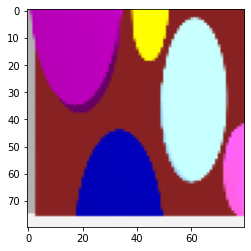

[ 3.817 -1.737]


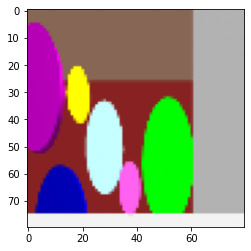

[ 7.514 -4.762]


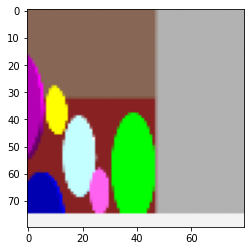

In [5]:
for x in range(0, 3):
    i = random.randint(0, len(data)-1)
    print(pose[i])
    plt.imshow(img[i].transpose(1,2,0))
    plt.show()

In [8]:
def norm_pose(pose, pose_min, pose_max):
    pose_norm = np.zeros_like(pose)
    pose_norm[:, 0] = (pose[:, 0] - pose_min[0]) / (pose_max[0] - pose_min[0])
    pose_norm[:, 1] = (pose[:, 1] - pose_min[1]) / (pose_max[1] - pose_min[1])
    # pose_norm[:, 2] = (pose[:, 2] - pose_min[2]) / (pose_max[2] - pose_min[2])

    return pose_norm

def unnorm_pose(pose, pose_min, pose_max):
    pose_unnorm = np.zeros_like(pose)
    pose_unnorm[:, 0] = pose[:, 0] * (pose_max[0] - pose_min[0]) + pose_min[0]
    pose_unnorm[:, 1] = pose[:, 1] * (pose_max[1] - pose_min[1]) + pose_min[1]
    pose_unnorm[:, 2] = pose[:, 2] * (pose_max[2] - pose_min[2]) + pose_min[2]

    return pose_unnorm

In [10]:
# pose_min = (pose[:, 0].min(), pose[:, 1].min(), pose[:, 2].min())
# pose_max = (pose[:, 0].max(), pose[:, 1].max(), pose[:, 2].max())

pose_min = (pose[:, 0].min(), pose[:, 1].min())
pose_max = (pose[:, 0].max(), pose[:, 1].max())

pose_norm = norm_pose(pose, pose_min, pose_max)

data_norm = (pose_norm, img)

In [11]:
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/shapes_dif_fixed_rgb8_1_10k_norm_np.pkl", 'wb') as f:
    pickle.dump(data_norm, f)